In [129]:
import sys
sys.path.append('C:/Users/royer/Documents/ProyectoFinalModelado/scr')

from dataset_generator import variables
from solver_fd import temp_chapa_P
from utils import graficarChapa

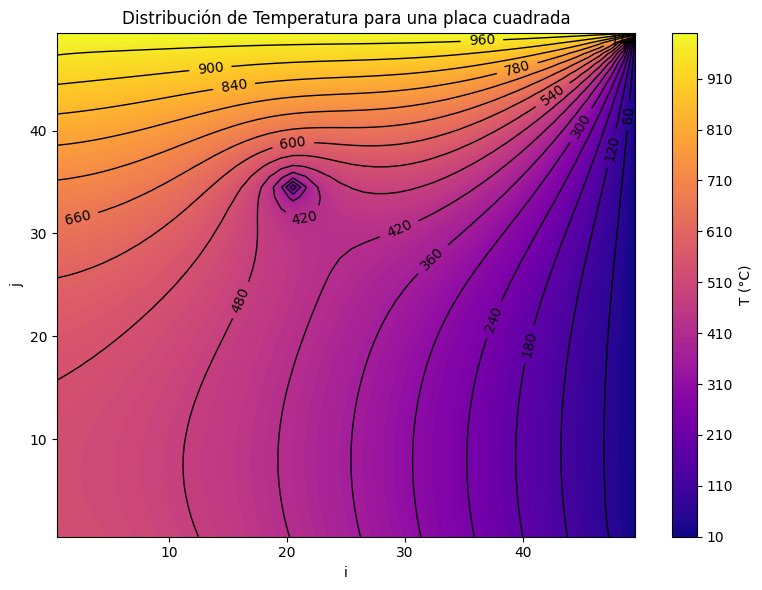

In [86]:
cond_contor = {'A':1000,'B':15,'C':9000,'D':-10000}

typ_cond_contorno = {'A':'temp','B':'temp','C':'flu','D':'flu'}

Nx = 50
Ny = 50
dx = 0.05
dy = 0.05
k = 205     #   Material considerado

hot_point = {'i': 20, 'j': 15, 'T': 200}

T = temp_chapa_P(cond_contor, Nx, Ny, typ_cond_contorno, dx, dy, k, hot_point)

graficarChapa(T,Nx,Ny)

{'A': -9424.887825703747, 'B': 2870.3321970727575, 'C': -236.06097133936964, 'D': 1028.9154272204205}
{'A': np.str_('flu'), 'B': np.str_('flu'), 'C': np.str_('flu'), 'D': np.str_('temp')}
{'i': 7, 'j': 14, 'T': 4.84736753084033}
Copper - Constantan (60% Cu, 40% Ni)


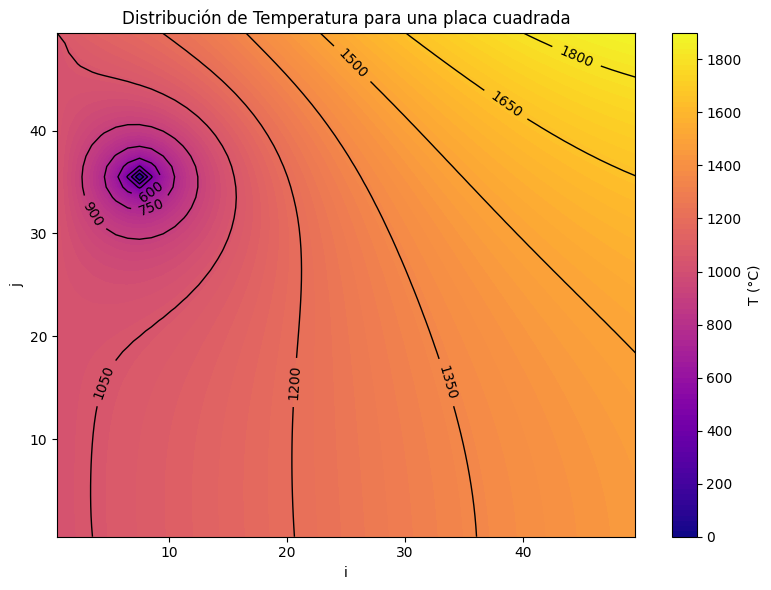

In [131]:
Nx = 50
Ny = 50
dx = 0.05
dy = 0.05

cond_contor, typ_cond_contorno, hot_point, k, material_nombre = variables(50, 50)

T = temp_chapa_P(cond_contor, Nx, Ny, typ_cond_contorno, dx, dy, k, hot_point)



print(cond_contor)
print(typ_cond_contorno)
print(hot_point)
print(material_nombre)

graficarChapa(T,Nx,Ny)

In [ ]:
import numpy as np
import pandas as pd

def generar_dataset(n_samples, Nx=50, Ny=50, dx=0.5, dy=0.5):
    X = []
    Y = []
    registros = []

    for i in range(n_samples):
        cond_contor, typ_cond_contorno, hot_point, k, material_nombre = variables(Nx, Ny)
        
        # Preparar entrada X
        tipo_map = {'temp': 0, 'flu': 1}
        tipo_A = tipo_map[typ_cond_contorno['A']]
        tipo_B = tipo_map[typ_cond_contorno['B']]
        tipo_C = tipo_map[typ_cond_contorno['C']]
        tipo_D = tipo_map[typ_cond_contorno['D']]
        
        x_sample = [
            k,
            hot_point['T'],
            hot_point['i'],
            hot_point['j'],
            tipo_A,
            tipo_B,
            tipo_C,
            tipo_D,
            cond_contor['A'],
            cond_contor['B'],
            cond_contor['C'],
            cond_contor['D']
        ]
        
        # Calcular distribución de temperatura
        T = temp_chapa_P(cond_contor, Nx, Ny, typ_cond_contorno, dx, dy, k, hot_point)
        y_sample = T.flatten()

        X.append(x_sample)
        Y.append(y_sample)
        
        registros.append({
            'material': material_nombre,
            'k': k,
            'T_hp': hot_point['T'],
            'i_hp': hot_point['i'],
            'j_hp': hot_point['j'],
            'tipo_A': typ_cond_contorno['A'],
            'tipo_B': typ_cond_contorno['B'],
            'tipo_C': typ_cond_contorno['C'],
            'tipo_D': typ_cond_contorno['D'],
            'valor_A': cond_contor['A'],
            'valor_B': cond_contor['B'],
            'valor_C': cond_contor['C'],
            'valor_D': cond_contor['D']
        })

        if i % 50 == 0:
            print(f"✅ {i}/{n_samples} muestras generadas.")

    X = np.array(X)
    Y = np.array(Y)

    np.save('C:/Users/royer/Documents/ProyectoFinalModelado/data/X.npy', X)
    np.save('C:/Users/royer/Documents/ProyectoFinalModelado/data/Y.npy', Y)

    df_registros = pd.DataFrame(registros)
    df_registros.to_csv('C:/Users/royer/Documents/ProyectoFinalModelado/data/dataset_variables.csv', index=False)

    print(f"✅ Dataset completo generado con {n_samples} muestras.")
